## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # count occurrences of grouped columns (Mouse ID and Timepoint)
# count_series_before = study_results.groupby(['Mouse ID', 'Timepoint']).size()
# count_series_before = count_series_before.to_frame(name = 'size').reset_index()
# count_series_before.sort_values(by='size', ascending=False).head(20)

In [2]:
# Combine the data into a single dataset
unrefined_merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df = unrefined_merge_df.rename(columns={"Age_months":"Age (Months)"})

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (Months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# count occurrences of grouped columns (Mouse ID and Timepoint)
count_series_before = merge_df.groupby(['Mouse ID', 'Timepoint']).size()
count_series_before = count_series_before.to_frame(name = 'size').reset_index()
count_series_before.sort_values(by='size', ascending=False).head(10)

,Mouse ID,Timepoint,size
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
0,a203,0,1
1264,q633,0,1
1260,q610,20,1
1261,q610,25,1
1262,q610,30,1


In [4]:
# Remove Mouse ID - Timepoint groups with more than one occurence
merge_df = merge_df[merge_df['Mouse ID'] != 'g989']
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (Months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimens_df = merge_df.groupby(['Drug Regimen'])
grouped_regimens_df.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age (Months),Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculate summary statistics
tv_mean = grouped_regimens_df['Tumor Volume (mm3)'].mean()
tv_median = grouped_regimens_df['Tumor Volume (mm3)'].median()
tv_var = grouped_regimens_df['Tumor Volume (mm3)'].var()
tv_std = grouped_regimens_df['Tumor Volume (mm3)'].std()
tv_sem = grouped_regimens_df['Tumor Volume (mm3)'].sem()

# Make DF
summary_df = pd.DataFrame({'Mean': tv_mean,
                          'Median': tv_median,
                          'Variance': tv_var,
                          'Std. Dev.': tv_std,
                          'SEM': tv_sem})
summary_df.reset_index()
summary_df.index.name=None
summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_df2 = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df2.reset_index()
summary_df2.index.name=None
summary_df2

,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_count = merge_df['Drug Regimen'].value_counts()

regimen_count_df = pd.DataFrame({'Count of Measurements': regimen_count})
regimen_count_df = regimen_count_df.reset_index()
regimen_count_df = regimen_count_df.rename(columns={'index': 'Regimen'})
regimen_count_df

,Regimen,Count of Measurements
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


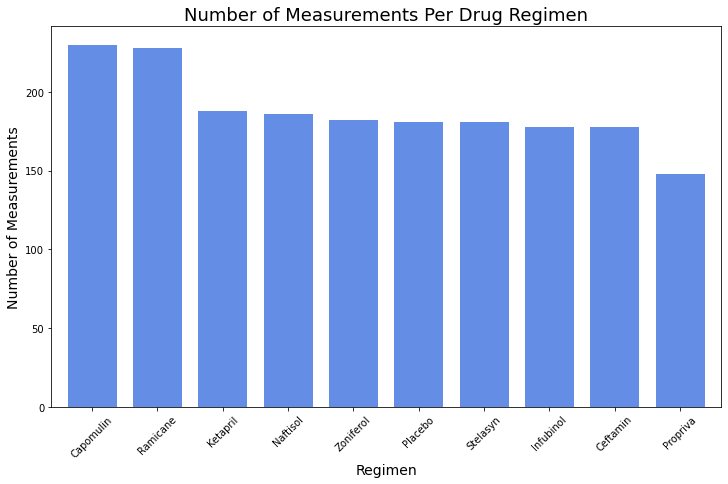

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_count_df.plot.bar(x='Regimen',
                          y='Count of Measurements',
                          rot=45,
                          color='#648DE5',
                          legend=False,
                          figsize=(12,7),
                          width=.75)
plt.title('Number of Measurements Per Drug Regimen', size=18)
plt.xlabel('Regimen', size=14)
plt.ylabel('Number of Measurements', size=14)
plt.show()
# Could not for the life of me find out how to re-size the title.

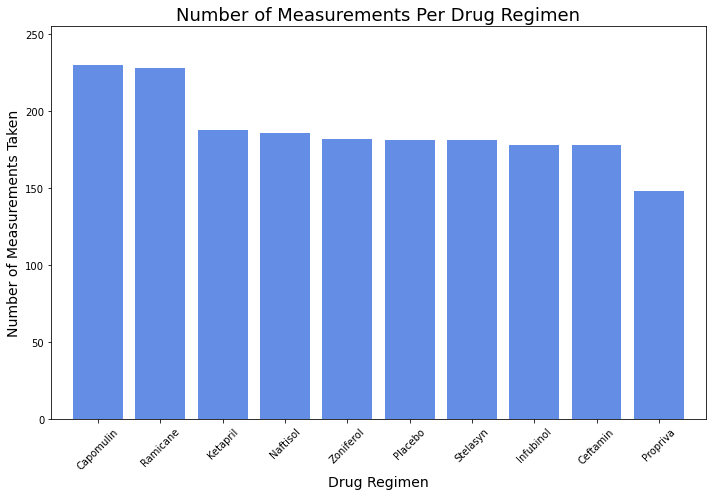

In [10]:
x_axis = np.arange(len(regimen_count_df))
tick_locations = [value for value in x_axis]
x_regimen = regimen_count_df['Regimen']
# regimens

y_regimen_counts = regimen_count_df['Count of Measurements']
# regimen_counts

plt.figure(figsize=(10, 7))
plt.bar(x_axis, y_regimen_counts, color='#648DE5')
plt.xlim(-0.75, len(x_regimen)-0.25)
plt.ylim(0, max(y_regimen_counts)+25)
plt.title('Number of Measurements Per Drug Regimen', fontsize=18)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Measurements Taken', fontsize=14)
plt.xticks(tick_locations, x_regimen, rotation='45')
plt.tight_layout()
plt.show()

In [11]:
sex_count = merge_df['Sex'].value_counts()
# sex_count

sex_count_df = pd.DataFrame({'Count of Sex': sex_count})
sex_count_df = sex_count_df.reset_index()
sex_count_df = sex_count_df.rename(columns={'index': 'Sex'})
sex_count_df

,Sex,Count of Sex
0,Male,958
1,Female,922


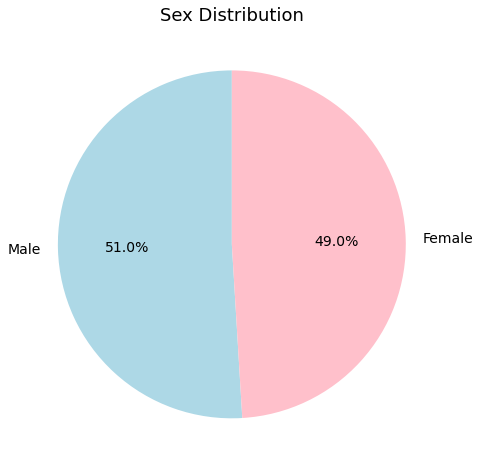

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = sex_count_df['Count of Sex']
sex_category = sex_count_df['Sex']
colors_pie = ['lightblue', 'pink']

sex_count_df.plot.pie(y='Count of Sex',
                      fontsize=14,
                      colors=colors_pie,
                      legend=False,
                      startangle=90,
                      autopct='%1.1f%%',
                      figsize=(14,8),
                      labels = sex_count_df['Sex'])
plt.title('Sex Distribution', size=18)
plt.ylabel('')
plt.show()
# Could not for the life of me find out how to re-size the title.

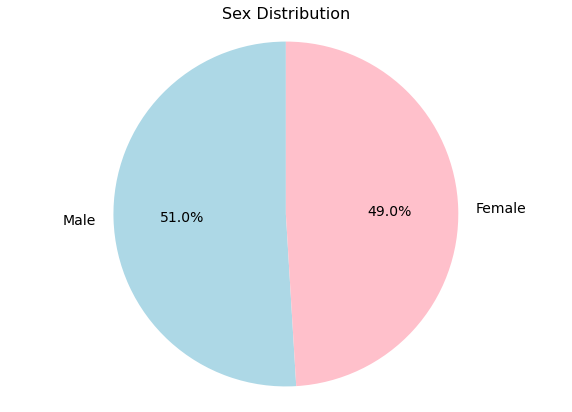

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = sex_count_df['Count of Sex']
sex_category = sex_count_df['Sex']
colors_pie = ['lightblue', 'pink']
textprops = {"fontsize":14}

plt.figure(figsize=(10, 7))
plt.pie(sex_counts, labels=sex_category, colors=colors_pie, autopct="%1.1f%%", startangle=90, textprops=textprops)
plt.title('Sex Distribution', fontsize=16)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (Months),Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume_df = merge_df.loc[(merge_df['Drug Regimen'] == 'Capomulin') |
                               (merge_df['Drug Regimen'] == 'Ramicane') |
                               (merge_df['Drug Regimen'] == 'Infubinol') |
                               (merge_df['Drug Regimen'] == 'Ceftamin')]

tumor_vol_group = tumor_volume_df.groupby('Mouse ID')
tumor_vol_group = tumor_vol_group['Timepoint'].max()

max_timepoint_df = pd.DataFrame({'Timepoint': tumor_vol_group})

max_timepoint_df = max_timepoint_df.reset_index()
max_timepoint_df = max_timepoint_df.rename(columns={'index': 'Mouse ID'})
max_timepoint_df.head(50)

max_timepoint_df = pd.merge(max_timepoint_df, merge_df, on=['Mouse ID', 'Timepoint'], how="left")
max_timepoint_df.sort_values('Mouse ID').head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (Months),Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


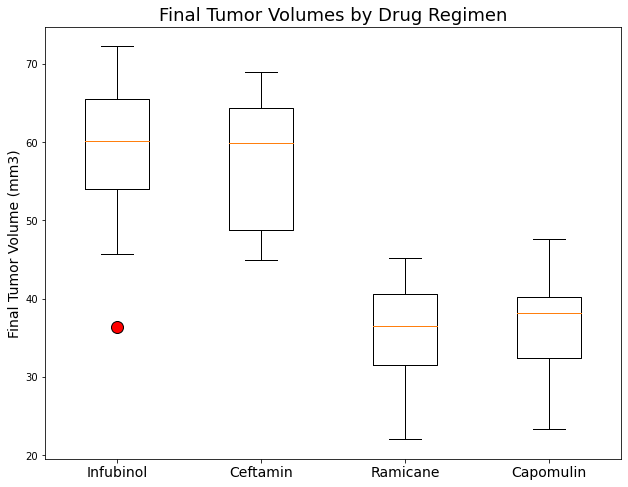

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Put treatments into a list for for loop (and later for plot labels)
regimen_list = max_timepoint_df['Drug Regimen'].unique()
regimen_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_timepoint_df.loc[max_timepoint_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)

# tumor_vol_list

fig = plt.figure(figsize =(8, 6))
ax = fig.add_axes([0, 0, 1, 1]) 
fliers = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none')
  
# Creating plot 
volume_boxplot = ax.boxplot(tumor_vol_list, flierprops=fliers) 
plt.title('Final Tumor Volumes by Drug Regimen', fontsize=18)
ax.set_xticklabels(regimen_list, fontsize=14)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=14)
plt.show()

## Line and Scatter Plots

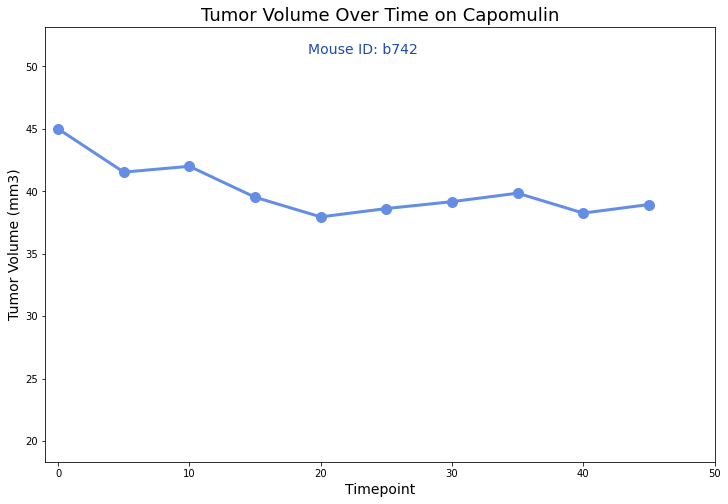

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Make list of unique mice from capomulin_df
capomulin_all_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
capomulin_all_df = capomulin_all_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

mouse_list = capomulin_all_df['Mouse ID'].unique()
mouse_list

# Take random mouse id from mouse list
mouse_id = random.choice(mouse_list)
mouse_id

# generate df from random mouse id
lineplot_df = capomulin_all_df.loc[capomulin_all_df['Mouse ID'] == mouse_id]
lineplot_df

line_x = lineplot_df['Timepoint']
line_y = lineplot_df['Tumor Volume (mm3)']

max_volume = capomulin_all_df['Tumor Volume (mm3)'].max()
min_volume = capomulin_all_df['Tumor Volume (mm3)'].min()

mouse_text = f'Mouse ID: {mouse_id}'

plt.figure(figsize=(12, 8))
plt.plot(line_x, line_y, marker='o', color='#648DE5', linewidth=3, markersize=10)
plt.title('Tumor Volume Over Time on Capomulin', fontsize=18)
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.xlim(-1, 50)
plt.ylim(min_volume-5, max_volume+5)
plt.annotate(mouse_text, (19,51), fontsize=14, color='#1e4bae')
plt.show()

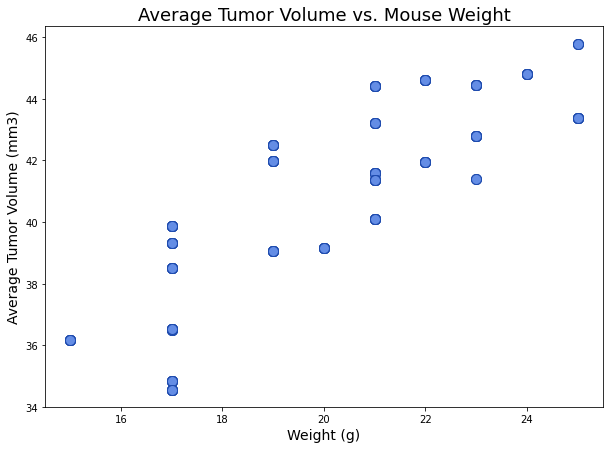

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Group Capomulin DF by Mouse ID
avg_tumor_vol = capomulin_all_df.groupby(['Mouse ID'])

# Calculate average tumor volume
avg_tumor_vol = avg_tumor_vol['Tumor Volume (mm3)'].mean()

# Turn group into DF
avg_tumor_vol_df = pd.DataFrame({'Average Tumor Volume': avg_tumor_vol})
avg_tumor_vol_df = avg_tumor_vol_df.reset_index()
avg_tumor_vol_df = avg_tumor_vol_df.rename(columns={'index': 'Mouse ID'})

# Merge Avg. Tumor Volume DF with Capomulin DF on Mouse ID
avg_tumor_vol_df = pd.merge(avg_tumor_vol_df, capomulin_all_df, on='Mouse ID', how='left')
avg_tumor_vol_df = avg_tumor_vol_df[['Mouse ID', 'Average Tumor Volume', 'Weight (g)']]
# avg_tumor_vol_df

# Build scatterplot
weight_x = avg_tumor_vol_df['Weight (g)']
avg_tumor_vol_y = avg_tumor_vol_df['Average Tumor Volume']

plt.figure(figsize=(10, 7))
plt.scatter(weight_x, avg_tumor_vol_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.title('Average Tumor Volume vs. Mouse Weight', fontsize=18)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.show()

## Correlation and Regression

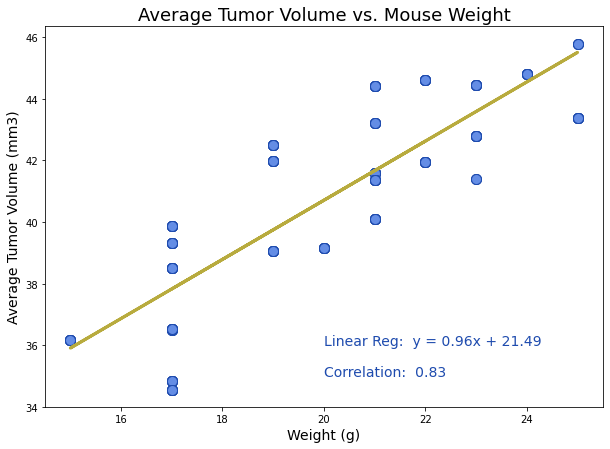

In [19]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

m_slope, m_int, m_r, m_p, m_std_err = st.linregress(weight_x, avg_tumor_vol_y)
regression = m_slope * weight_x + m_int
regression_txt = f'y = {str(round(m_slope,2))}x + {str(round(m_int,2))}'

plt.figure(figsize=(10, 7))
plt.scatter(weight_x, avg_tumor_vol_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(weight_x, regression, color='#B8AB3E', linewidth=3)
plt.title('Average Tumor Volume vs. Mouse Weight', fontsize=18)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.annotate(f'Correlation:  {round(m_r, 2)}', (20,35), fontsize=14, color='#1e4bae')
plt.annotate(f'Linear Reg:  {regression_txt}', (20,36), fontsize=14, color='#1e4bae')
plt.show()